In [97]:
import pandas as pd

In [98]:
import matplotlib.pyplot as plt

In [99]:
import matplotlib.dates as mdates

In [100]:
import seaborn as sns

In [101]:
biker_stock=pd.read_csv("DATAFrames/SAPAnalyticsReport(ZAB6298294C0B1427F470F1) - SAPAnalyticsReport(ZAB6298294C0B1427F470F1).csv")

In [102]:
biker_sales=pd.read_csv("DATAFrames/SAPAnalyticsReport(CRMCIVIB_Q0001) (1) - SAPAnalyticsReport(CRMCIVIB_Q0001) (1).csv",parse_dates=["Fecha de factura"])

In [103]:
#format the date column into a specific standart
biker_sales["Fecha de factura"] = pd.to_datetime(biker_sales["Fecha de factura"], format='%Y-%m-%d')

In [104]:
#sort the biker_sales dataframe as per the date column
biker_sales=biker_sales.sort_values("Fecha de factura")

In [105]:
#clean the Valor neto facturado column by removing the MXN
biker_sales["Valor neto facturado"]=biker_sales["Valor neto facturado"].str.strip(to_strip=" MXN")

In [106]:
#this line and the next 3 cleans the Valor neto facturado column even more and change dtype from object to float
biker_sales["Valor neto facturado"]=biker_sales["Valor neto facturado"].astype("string")

In [107]:
biker_sales["Valor neto facturado"]=biker_sales["Valor neto facturado"].str.replace(".","")

In [108]:
biker_sales["Valor neto facturado"]=biker_sales["Valor neto facturado"].str.replace(",",".")

In [109]:
biker_sales["Valor neto facturado"]=biker_sales["Valor neto facturado"].astype("float")

In [110]:
biker_sales

,Mes/año natural,Fecha de factura,ID de unidad funcional (Organización de ventas),Unnamed: 3,Producto,Unnamed: 5,Valor neto facturado
74,agosto 2024,2024-08-14,VC_V_O1002,Ventas corporativas Ventas,872-BLANCO,BIKER-BLANCO,199.14
75,agosto 2024,2024-08-16,VC_V_O1002,Ventas corporativas Ventas,872-BLANCO,BIKER-BLANCO,189.66
76,agosto 2024,2024-08-17,DE_V_K1002,Deportextil 2 Ventas,872-BLANCO,BIKER-BLANCO,843.97
77,agosto 2024,2024-08-22,TJ_V_T1002,Tijuana Ventas,872-BLANCO,BIKER-BLANCO,58.71
78,agosto 2024,2024-08-23,TJ_V_T1002,Tijuana Ventas,872-BLANCO,BIKER-BLANCO,3644.53
...,...,...,...,...,...,...,...
8,febrero 2025,2025-02-12,CA_V_U1002,Cancún Ventas,872-BLANCO,BIKER-BLANCO,652.80
11,febrero 2025,2025-02-14,CA_V_U1002,Cancún Ventas,872-BLANCO,BIKER-BLANCO,200.86
12,febrero 2025,2025-02-15,MO_V_C1002,Monterrey Ventas,872-BLANCO,BIKER-BLANCO,142.22
13,febrero 2025,2025-02-18,TJ_V_T1002,Tijuana Ventas,872-BLANCO,BIKER-BLANCO,32.14


In [111]:
#creating a new column with the amount of every transaction using the price per KG
biker_sales["Amount KG"]=(biker_sales["Valor neto facturado"])/226

In [112]:
biker_sales

,Mes/año natural,Fecha de factura,ID de unidad funcional (Organización de ventas),Unnamed: 3,Producto,Unnamed: 5,Valor neto facturado,Amount KG
74,agosto 2024,2024-08-14,VC_V_O1002,Ventas corporativas Ventas,872-BLANCO,BIKER-BLANCO,199.14,0.881150
75,agosto 2024,2024-08-16,VC_V_O1002,Ventas corporativas Ventas,872-BLANCO,BIKER-BLANCO,189.66,0.839204
76,agosto 2024,2024-08-17,DE_V_K1002,Deportextil 2 Ventas,872-BLANCO,BIKER-BLANCO,843.97,3.734381
77,agosto 2024,2024-08-22,TJ_V_T1002,Tijuana Ventas,872-BLANCO,BIKER-BLANCO,58.71,0.259779
78,agosto 2024,2024-08-23,TJ_V_T1002,Tijuana Ventas,872-BLANCO,BIKER-BLANCO,3644.53,16.126239
...,...,...,...,...,...,...,...,...
8,febrero 2025,2025-02-12,CA_V_U1002,Cancún Ventas,872-BLANCO,BIKER-BLANCO,652.80,2.888496
11,febrero 2025,2025-02-14,CA_V_U1002,Cancún Ventas,872-BLANCO,BIKER-BLANCO,200.86,0.888761
12,febrero 2025,2025-02-15,MO_V_C1002,Monterrey Ventas,872-BLANCO,BIKER-BLANCO,142.22,0.629292
13,febrero 2025,2025-02-18,TJ_V_T1002,Tijuana Ventas,872-BLANCO,BIKER-BLANCO,32.14,0.142212


In [113]:
#finding the sum(KG) of all the 872-NEGRO products
biker_negro=biker_sales[biker_sales["Producto"]=="872-NEGRO"]
biker_negro["Amount KG"].sum()

36.73486725663717

In [114]:
biker_negro

,Mes/año natural,Fecha de factura,ID de unidad funcional (Organización de ventas),Unnamed: 3,Producto,Unnamed: 5,Valor neto facturado,Amount KG
63,octubre 2024,2024-10-22,DE_V_K1002,Deportextil 2 Ventas,872-NEGRO,BIKER-NEGRO,185.86,0.822389
64,octubre 2024,2024-10-23,DE_V_K1002,Deportextil 2 Ventas,872-NEGRO,BIKER-NEGRO,587.93,2.601460
39,noviembre 2024,2024-11-04,TR_V_H1002,Torreón Ventas,872-NEGRO,BIKER-NEGRO,176.38,0.780442
37,noviembre 2024,2024-11-04,OA_V_M1002,Oaxaca Ventas,872-NEGRO,BIKER-NEGRO,1124.66,4.976372
53,noviembre 2024,2024-11-25,MO_V_C1002,Monterrey Ventas,872-NEGRO,BIKER-NEGRO,948.28,4.195929
29,diciembre 2024,2024-12-03,DE_V_K2002,Deportextil 2 Ventas,872-NEGRO,BIKER-NEGRO,105.60,0.467257
25,enero 2025,2025-01-28,OA_V_M1002,Oaxaca Ventas,872-NEGRO,BIKER-NEGRO,584.48,2.586195
2,febrero 2025,2025-02-04,TR_V_H1002,Torreón Ventas,872-NEGRO,BIKER-NEGRO,122.74,0.543097
0,febrero 2025,2025-02-04,DE_V_K1002,Deportextil 2 Ventas,872-NEGRO,BIKER-NEGRO,1170.91,5.181018
4,febrero 2025,2025-02-07,DE_V_K2002,Deportextil 2 Ventas,872-NEGRO,BIKER-NEGRO,1346.96,5.960000


In [115]:
##finding the sum(KG) of all the 872-BLANCO products
biker_blanco=biker_sales[biker_sales["Producto"]=="872-BLANCO"]
biker_blanco["Amount KG"].sum()

230.08929203539824

In [116]:
#Creating 3 new columns containing the cumulative sales of Blanco, negro and both combined
biker_sales["total cumulative sales(KG)"]=biker_sales["Amount KG"].cumsum(axis=0)
biker_sales["blanco cumulative sales(KG)"]=biker_blanco["Amount KG"].cumsum(axis=0)
biker_sales["negro cumulative sales(KG)"]=biker_negro["Amount KG"].cumsum(axis=0)

In [117]:
biker_blanco

,Mes/año natural,Fecha de factura,ID de unidad funcional (Organización de ventas),Unnamed: 3,Producto,Unnamed: 5,Valor neto facturado,Amount KG
74,agosto 2024,2024-08-14,VC_V_O1002,Ventas corporativas Ventas,872-BLANCO,BIKER-BLANCO,199.14,0.881150
75,agosto 2024,2024-08-16,VC_V_O1002,Ventas corporativas Ventas,872-BLANCO,BIKER-BLANCO,189.66,0.839204
76,agosto 2024,2024-08-17,DE_V_K1002,Deportextil 2 Ventas,872-BLANCO,BIKER-BLANCO,843.97,3.734381
77,agosto 2024,2024-08-22,TJ_V_T1002,Tijuana Ventas,872-BLANCO,BIKER-BLANCO,58.71,0.259779
78,agosto 2024,2024-08-23,TJ_V_T1002,Tijuana Ventas,872-BLANCO,BIKER-BLANCO,3644.53,16.126239
...,...,...,...,...,...,...,...,...
8,febrero 2025,2025-02-12,CA_V_U1002,Cancún Ventas,872-BLANCO,BIKER-BLANCO,652.80,2.888496
11,febrero 2025,2025-02-14,CA_V_U1002,Cancún Ventas,872-BLANCO,BIKER-BLANCO,200.86,0.888761
12,febrero 2025,2025-02-15,MO_V_C1002,Monterrey Ventas,872-BLANCO,BIKER-BLANCO,142.22,0.629292
13,febrero 2025,2025-02-18,TJ_V_T1002,Tijuana Ventas,872-BLANCO,BIKER-BLANCO,32.14,0.142212


In [118]:
biker_stock

,Almacén,Unnamed: 1,Material,Unnamed: 3,Área de logística,Unnamed: 5,Stock sin restringir,Stock restringido,Stock en inspección de calidad,Stock en almacén,Contador
0,AG_I1000,Aguascalientes,872-BLANCO,BIKER-BLANCO,AG_I1000/AG_BODEGA,BODEGA AGUASCALIENTES,"20,5",0,0,"20,5",1
1,CA_U1000,Cancún,872-BLANCO,BIKER-BLANCO,CA_U1000/CA_BODEGA,BODEGA CANCUN,"17,1",0,0,"17,1",1
2,NaN,NaN,NaN,NaN,CA_U1000/CA_PISO,PISO CANCUN,"18,14",0,0,"18,14",1
3,CED_X1000,Centro de Distribución CDMX,872-BLANCO,BIKER-BLANCO,CED_X1000/CED_TELAS,CEDIS TELAS,"239,85",0,0,"239,85",12
4,NaN,NaN,872-NEGRO,BIKER-NEGRO,CED_X1000/CED_TELAS,CEDIS TELAS,"265,9",0,0,"265,9",13
5,DE_K1000,Deportextil 2,872-BLANCO,BIKER-BLANCO,DE_K1000/DE_BODEGA,BODEGA DEPORTEXTIL 2,"42,25",0,0,"42,25",2
6,NaN,NaN,NaN,NaN,DE_K1000/DE_PISO,PISO DEPORTEXTIL 2,"23,27",0,0,"23,27",1
7,NaN,NaN,872-NEGRO,BIKER-NEGRO,DE_K1000/DE_BODEGA,BODEGA DEPORTEXTIL 2,"42,8",0,0,"42,8",2
8,NaN,NaN,NaN,NaN,DE_K1000/DE_PISO,PISO DEPORTEXTIL 2,"25,94",0,0,"25,94",1
9,GU_N1000,Guatemala,872-BLANCO,BIKER-BLANCO,GU_N1000/GU_PISO,PISO GUATEMALA,"-2,01",0,0,"-2,01",1


In [119]:
#dropping the column Unnamed 3 since it is unnecessary
biker_stock.drop("Unnamed: 3", axis=1, inplace=True)

In [120]:
biker_stock

,Almacén,Unnamed: 1,Material,Área de logística,Unnamed: 5,Stock sin restringir,Stock restringido,Stock en inspección de calidad,Stock en almacén,Contador
0,AG_I1000,Aguascalientes,872-BLANCO,AG_I1000/AG_BODEGA,BODEGA AGUASCALIENTES,"20,5",0,0,"20,5",1
1,CA_U1000,Cancún,872-BLANCO,CA_U1000/CA_BODEGA,BODEGA CANCUN,"17,1",0,0,"17,1",1
2,NaN,NaN,NaN,CA_U1000/CA_PISO,PISO CANCUN,"18,14",0,0,"18,14",1
3,CED_X1000,Centro de Distribución CDMX,872-BLANCO,CED_X1000/CED_TELAS,CEDIS TELAS,"239,85",0,0,"239,85",12
4,NaN,NaN,872-NEGRO,CED_X1000/CED_TELAS,CEDIS TELAS,"265,9",0,0,"265,9",13
5,DE_K1000,Deportextil 2,872-BLANCO,DE_K1000/DE_BODEGA,BODEGA DEPORTEXTIL 2,"42,25",0,0,"42,25",2
6,NaN,NaN,NaN,DE_K1000/DE_PISO,PISO DEPORTEXTIL 2,"23,27",0,0,"23,27",1
7,NaN,NaN,872-NEGRO,DE_K1000/DE_BODEGA,BODEGA DEPORTEXTIL 2,"42,8",0,0,"42,8",2
8,NaN,NaN,NaN,DE_K1000/DE_PISO,PISO DEPORTEXTIL 2,"25,94",0,0,"25,94",1
9,GU_N1000,Guatemala,872-BLANCO,GU_N1000/GU_PISO,PISO GUATEMALA,"-2,01",0,0,"-2,01",1


In [121]:
#fill all the NaN in the Material column with the right associated Material
biker_stock["Material"]=biker_stock["Material"].astype("string")
biker_stock=biker_stock.fillna({"Material":"872-BLANCO"})
biker_stock.loc[[8],["Material"]]="872-NEGRO"

In [122]:
biker_stock

,Almacén,Unnamed: 1,Material,Área de logística,Unnamed: 5,Stock sin restringir,Stock restringido,Stock en inspección de calidad,Stock en almacén,Contador
0,AG_I1000,Aguascalientes,872-BLANCO,AG_I1000/AG_BODEGA,BODEGA AGUASCALIENTES,"20,5",0,0,"20,5",1
1,CA_U1000,Cancún,872-BLANCO,CA_U1000/CA_BODEGA,BODEGA CANCUN,"17,1",0,0,"17,1",1
2,NaN,NaN,872-BLANCO,CA_U1000/CA_PISO,PISO CANCUN,"18,14",0,0,"18,14",1
3,CED_X1000,Centro de Distribución CDMX,872-BLANCO,CED_X1000/CED_TELAS,CEDIS TELAS,"239,85",0,0,"239,85",12
4,NaN,NaN,872-NEGRO,CED_X1000/CED_TELAS,CEDIS TELAS,"265,9",0,0,"265,9",13
5,DE_K1000,Deportextil 2,872-BLANCO,DE_K1000/DE_BODEGA,BODEGA DEPORTEXTIL 2,"42,25",0,0,"42,25",2
6,NaN,NaN,872-BLANCO,DE_K1000/DE_PISO,PISO DEPORTEXTIL 2,"23,27",0,0,"23,27",1
7,NaN,NaN,872-NEGRO,DE_K1000/DE_BODEGA,BODEGA DEPORTEXTIL 2,"42,8",0,0,"42,8",2
8,NaN,NaN,872-NEGRO,DE_K1000/DE_PISO,PISO DEPORTEXTIL 2,"25,94",0,0,"25,94",1
9,GU_N1000,Guatemala,872-BLANCO,GU_N1000/GU_PISO,PISO GUATEMALA,"-2,01",0,0,"-2,01",1


In [123]:
#Changing dtype in Stock en almacén column to float and do some cleaning
biker_stock["Stock en almacén"]=biker_stock["Stock en almacén"].str.replace(",",".")
biker_stock["Stock en almacén"]=biker_stock["Stock en almacén"].astype("float")

In [124]:
#finding total Blanco in stock (KG)
blanco=biker_stock[biker_stock["Material"]=="872-BLANCO"]
blanco["Stock en almacén"].sum()

531.9000000000001

In [125]:
#finding total Negro in stock (KG)
negro=biker_stock[biker_stock["Material"]=="872-NEGRO"]
negro["Stock en almacén"].sum()

374.48

In [126]:
#10 largest transaction associated to Blanco sales
biker_blanco["Valor neto facturado"].nlargest(10)

60    4987.93
80    4046.94
78    3644.53
58    3452.47
9     2337.94
23    2309.91
61    2275.86
54    2237.93
33    1896.55
22    1661.88
Name: Valor neto facturado, dtype: float64

In [127]:
#10 smallest transaction associated to Blanco sales
biker_blanco["Valor neto facturado"].nsmallest(10)

13    32.14
77    58.71
27    60.26
46    64.48
16    66.53
48    68.20
36    70.17
56    70.40
7     89.62
18    97.84
Name: Valor neto facturado, dtype: float64

In [128]:
#11 transactions associated to Negro sales
biker_negro["Valor neto facturado"].nlargest(11)

6     1948.28
4     1346.96
0     1170.91
37    1124.66
53     948.28
64     587.93
25     584.48
63     185.86
39     176.38
2      122.74
29     105.60
Name: Valor neto facturado, dtype: float64

In [129]:
#creating a new column that counts the sales in the new order set by the Fecha de factura column
biker_sales["amount of sales"]=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82]

In [130]:
biker_sales

,Mes/año natural,Fecha de factura,ID de unidad funcional (Organización de ventas),Unnamed: 3,Producto,Unnamed: 5,Valor neto facturado,Amount KG,total cumulative sales(KG),blanco cumulative sales(KG),negro cumulative sales(KG),amount of sales
74,agosto 2024,2024-08-14,VC_V_O1002,Ventas corporativas Ventas,872-BLANCO,BIKER-BLANCO,199.14,0.881150,0.881150,0.881150,NaN,1
75,agosto 2024,2024-08-16,VC_V_O1002,Ventas corporativas Ventas,872-BLANCO,BIKER-BLANCO,189.66,0.839204,1.720354,1.720354,NaN,2
76,agosto 2024,2024-08-17,DE_V_K1002,Deportextil 2 Ventas,872-BLANCO,BIKER-BLANCO,843.97,3.734381,5.454735,5.454735,NaN,3
77,agosto 2024,2024-08-22,TJ_V_T1002,Tijuana Ventas,872-BLANCO,BIKER-BLANCO,58.71,0.259779,5.714513,5.714513,NaN,4
78,agosto 2024,2024-08-23,TJ_V_T1002,Tijuana Ventas,872-BLANCO,BIKER-BLANCO,3644.53,16.126239,21.840752,21.840752,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...
8,febrero 2025,2025-02-12,CA_V_U1002,Cancún Ventas,872-BLANCO,BIKER-BLANCO,652.80,2.888496,264.073894,227.339027,NaN,78
11,febrero 2025,2025-02-14,CA_V_U1002,Cancún Ventas,872-BLANCO,BIKER-BLANCO,200.86,0.888761,264.962655,228.227788,NaN,79
12,febrero 2025,2025-02-15,MO_V_C1002,Monterrey Ventas,872-BLANCO,BIKER-BLANCO,142.22,0.629292,265.591947,228.857080,NaN,80
13,febrero 2025,2025-02-18,TJ_V_T1002,Tijuana Ventas,872-BLANCO,BIKER-BLANCO,32.14,0.142212,265.734159,228.999292,NaN,81


Text(0.5, 1.0, 'distribution of sales')

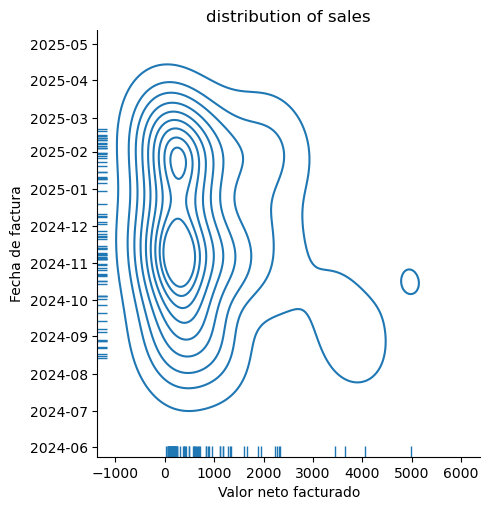

In [131]:
#Creating a simple plot that shows the distribution of Biker product depending on the dates and the size of the transaction
#as we can see most of the sales happened in feb. and nov., and most of the transactions were between 0 and 1000 pesos.
sns.displot(data=biker_sales, kind="kde", y="Fecha de factura",x="Valor neto facturado", rug=True)
plt.title("distribution of sales")

Text(0.5, 1.0, 'distribution of sales')

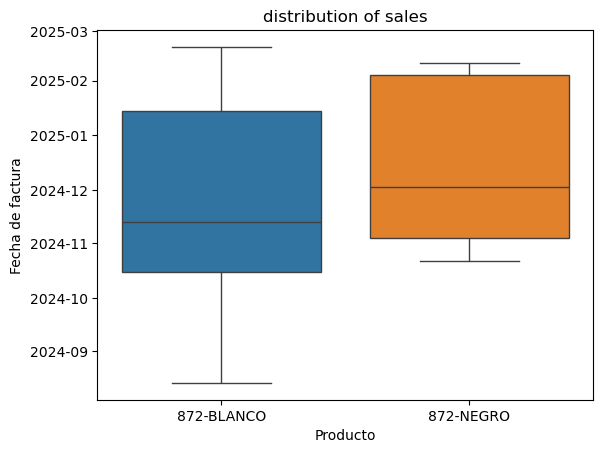

In [190]:
#another way to quickly visualize the same results
sns.boxplot(data=biker_sales, y="Fecha de factura",x="Producto", hue="Producto")
plt.title("distribution of sales")

Text(0.5, 1.05, 'Sales density per material')

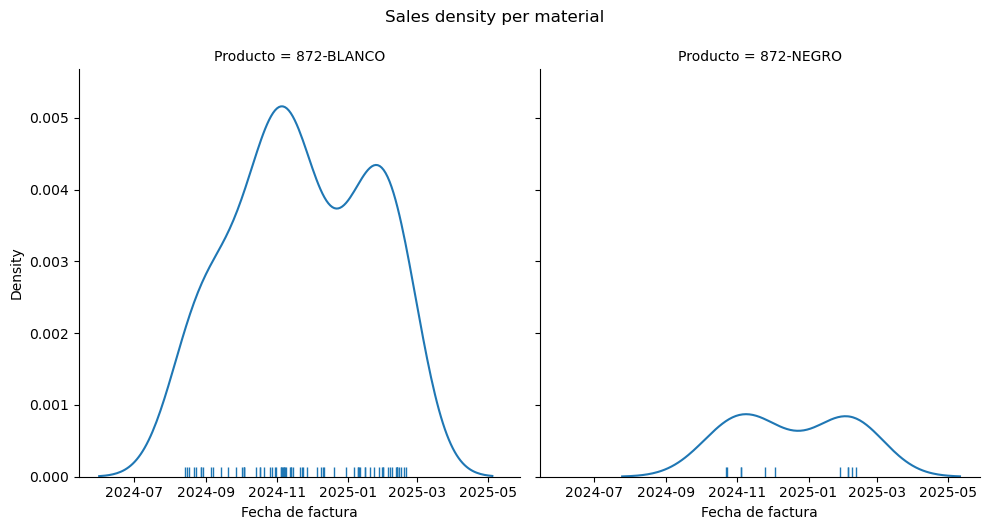

In [133]:
#another way to quickly visualize the same results with the density of transactions
sns.displot(data=biker_sales, kind="kde", x="Fecha de factura",col="Producto", rug=True)
plt.suptitle("Sales density per material", position=(0.5,1.05))

Text(0.5, 1.0, 'number of sales')

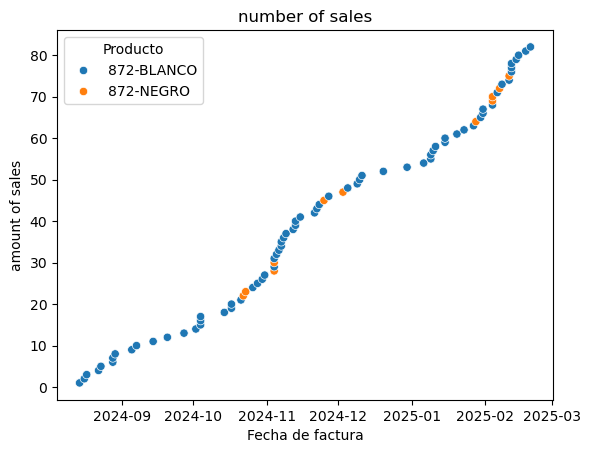

In [134]:
#here is probably the easiest one so far, same conclusion, most sales in nov. and feb. using the new column "amount of sales"
sns.scatterplot(data=biker_sales, x="Fecha de factura", y="amount of sales",hue="Producto")
plt.title("number of sales")

In [135]:
#average sales for 3 months in general (data contains a lapse time of 5 months)
((biker_sales.groupby("Unnamed: 3")["Amount KG"].sum().sort_values())/5)*3

Unnamed: 3
Torreón Ventas                 2.754053
Guatemala Ventas              12.446788
Ventas corporativas Ventas    13.129407
Oaxaca Ventas                 14.460717
Tijuana Ventas                22.955230
Cancún Ventas                 23.286982
Monterrey Ventas              28.252779
Deportextil 2 Ventas          42.808540
Name: Amount KG, dtype: float64

In [136]:
#amount of sales divided in the different warehouses
biker_sales["Unnamed: 3"].value_counts().sort_values()

Unnamed: 3
Guatemala Ventas               4
Ventas corporativas Ventas     6
Tijuana Ventas                 7
Torreón Ventas                 7
Monterrey Ventas               9
Oaxaca Ventas                 10
Cancún Ventas                 16
Deportextil 2 Ventas          23
Name: count, dtype: int64

In [137]:
#Couldve get the same result using bfill().Filling the NaN in the Unnamed 1 column with their correct associated value
biker_stock.loc[[4],["Unnamed: 1"]]="Centro de Distribución CDMX"
biker_stock.loc[[6,7,8],["Unnamed: 1"]]="Deportextil 2"
biker_stock.loc[[10],["Unnamed: 1"]]="Guatemala"
biker_stock.loc[[12,13],["Unnamed: 1"]]="Monterrey"
biker_stock.loc[[15],["Unnamed: 1"]]="Oaxaca"
biker_stock.loc[[17],["Unnamed: 1"]]="Tijuana"
biker_stock.loc[[19,20],["Unnamed: 1"]]="Torreón"
biker_stock.loc[[2],["Unnamed: 1"]]="Cancún"

In [138]:
biker_stock

,Almacén,Unnamed: 1,Material,Área de logística,Unnamed: 5,Stock sin restringir,Stock restringido,Stock en inspección de calidad,Stock en almacén,Contador
0,AG_I1000,Aguascalientes,872-BLANCO,AG_I1000/AG_BODEGA,BODEGA AGUASCALIENTES,"20,5",0,0,20.50,1
1,CA_U1000,Cancún,872-BLANCO,CA_U1000/CA_BODEGA,BODEGA CANCUN,"17,1",0,0,17.10,1
2,NaN,Cancún,872-BLANCO,CA_U1000/CA_PISO,PISO CANCUN,"18,14",0,0,18.14,1
3,CED_X1000,Centro de Distribución CDMX,872-BLANCO,CED_X1000/CED_TELAS,CEDIS TELAS,"239,85",0,0,239.85,12
4,NaN,Centro de Distribución CDMX,872-NEGRO,CED_X1000/CED_TELAS,CEDIS TELAS,"265,9",0,0,265.90,13
5,DE_K1000,Deportextil 2,872-BLANCO,DE_K1000/DE_BODEGA,BODEGA DEPORTEXTIL 2,"42,25",0,0,42.25,2
6,NaN,Deportextil 2,872-BLANCO,DE_K1000/DE_PISO,PISO DEPORTEXTIL 2,"23,27",0,0,23.27,1
7,NaN,Deportextil 2,872-NEGRO,DE_K1000/DE_BODEGA,BODEGA DEPORTEXTIL 2,"42,8",0,0,42.80,2
8,NaN,Deportextil 2,872-NEGRO,DE_K1000/DE_PISO,PISO DEPORTEXTIL 2,"25,94",0,0,25.94,1
9,GU_N1000,Guatemala,872-BLANCO,GU_N1000/GU_PISO,PISO GUATEMALA,"-2,01",0,0,-2.01,1


In [139]:
#distribution of the biker stock in the different warehouses
biker_stock.groupby("Unnamed: 1")["Stock en almacén"].sum().sort_values()

Unnamed: 1
Guatemala                      -12.01
Ventas corporativas              6.33
Aguascalientes                  20.50
Oaxaca                          35.07
Cancún                          35.24
Monterrey                       46.56
Torreón                         57.99
Tijuana                         76.69
Deportextil 2                  134.26
Centro de Distribución CDMX    505.75
Name: Stock en almacén, dtype: float64

In [140]:
#Making a ffill() on the negro and blanco cumulative columns to get rid of the NaN
biker_sales["blanco cumulative sales(KG)"]=biker_sales["blanco cumulative sales(KG)"].ffill()
biker_sales["negro cumulative sales(KG)"]=biker_sales["negro cumulative sales(KG)"].ffill()

In [141]:
#formatting the Fecha de factura column to specific format before using it in a plot.
biker_sales["Fecha de factura"]=pd.to_datetime(biker_sales["Fecha de factura"], format="%Y/%m/%d")

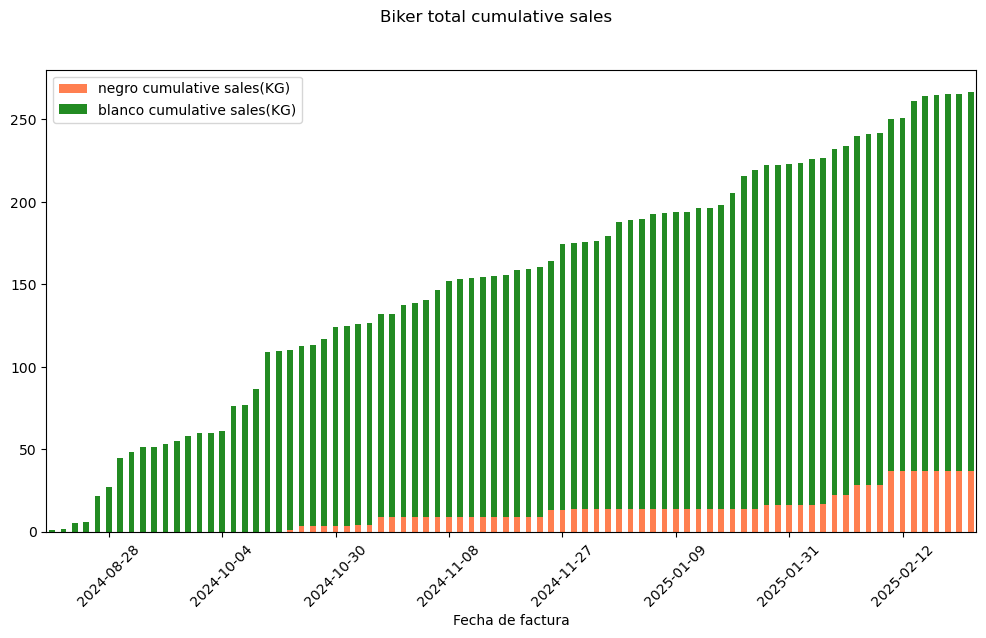

In [142]:
#creating a plot showing cumulative sales of both products through time using only the dates as index
fig, ax = plt.subplots(figsize=(12, 6))
plt.suptitle("Biker total cumulative sales")
biker_sales.set_index(biker_sales["Fecha de factura"].dt.date)[['negro cumulative sales(KG)','blanco cumulative sales(KG)']].plot(kind='bar', stacked=True, ax=ax,color=["#FF7F50","#228B22"])
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.xticks(rotation=45)
plt.legend()
plt.show()